In [28]:
import sklearn
import librosa
import librosa.display
import numpy as np
import glob
import os
import cv2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [7]:
spektogram, labels = [], []
folders = ['OAF_angry', 'OAF_happy', 'OAF_Sad']

In [8]:
for folder in folders:
    for spc in glob.glob(f'speech_dataset\{folder}\*'):
        y, sr = librosa.load(spc)
        spec = np.abs(librosa.stft(y))
        spec = librosa.amplitude_to_db(spec, ref=np.max)
        spec = cv2.resize(spec, (64, 64))
        spec = spec.flatten()
        spektogram.append(spec)
        labels.append(folder)
data = pd.DataFrame(spektogram)
data['label'] = labels
data.to_csv('./dataset/spectrogram.csv', index=False)

In [9]:
data = pd.read_csv('./dataset/spektogram.csv')
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,-74.547005,-69.441480,-74.354180,-70.005775,-63.871067,-64.141815,-61.870876,-59.787724,-67.943245,-76.942040,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
1,-65.116150,-72.595764,-74.772910,-71.764640,-69.378540,-70.507440,-67.222600,-59.736267,-58.273090,-63.617060,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
2,-69.728210,-71.085205,-71.162094,-70.901930,-72.016846,-72.039960,-73.833430,-71.225190,-67.749680,-74.379260,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
3,-70.544030,-73.021650,-72.255170,-69.449710,-69.694780,-70.653430,-63.136883,-60.183846,-69.370080,-75.848694,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry
4,-70.798770,-71.076420,-67.429910,-68.385820,-62.089560,-59.170700,-59.488174,-64.614944,-66.215126,-65.286080,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,OAF_angry


In [33]:
y = data['label']
X = data.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
SVM = SVC(C=1.0)
SVM.fit(X_train,y_train)
predictions_SVM = SVM.predict(X_test)
print(classification_report(y_test, predictions_SVM))
print(accuracy_score(y_test, predictions_SVM)*100)

              precision    recall  f1-score   support

     OAF_Sad       1.00      1.00      1.00        38
   OAF_angry       1.00      1.00      1.00        38
   OAF_happy       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

100.0


Text(58.222222222222214, 0.5, 'Actual')

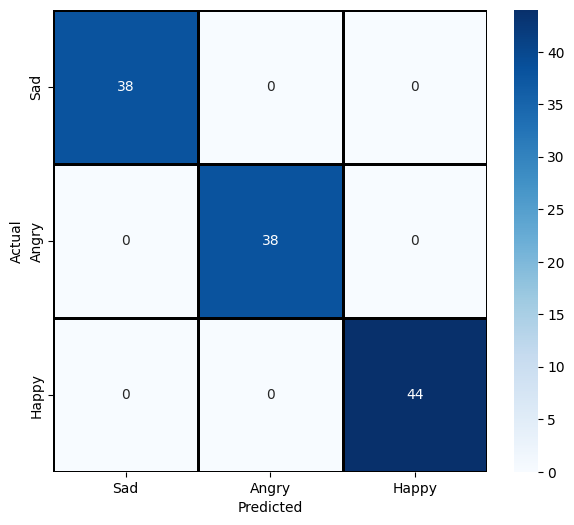

In [36]:
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize = (7,6))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Sad', 'Angry', 'Happy'], 
            yticklabels = ['Sad', 'Angry', 'Happy'])
plt.xlabel("Predicted")
plt.ylabel("Actual")